# DESCRIPTION
Predict cancer mortality rates for US counties.
SUMMARY
Multiple Linear Regression Challenge
Background
These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov. Most of the data preparation process can be viewed here  (https://data.world/nrippner/cancer-trials)

Your Task: Build a multivariate Ordinary Least Squares regression model to predict "TARGET_deathRate"
Deliverables
a. Your final model equation

b. The statistical software output including (adjusted) R-squared and Root Mean Squared Error (RMSE)

c. Your code file (if you used a programming language)

d. Model diagnostics including statistics and visualizations:

- Assess linearity of model (parameters)
- Assess serial independence of errors
- Assess heteroskedasticity
- Assess normality of residual distribution
- Assess multicollinearity
e. Your interpretation of the model

f. Other factors to consider:

- Are there any outliers?
- Are there missing values?
- How will you handle categorical variables?


In [1]:
import pandas as pd

#with open('cancer_reg.csv') as f:
#    print(f)
cancer_stats = pd.read_csv('cancer_reg.csv', encoding='UTF-8')
cancer_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [2]:
import chardet    

# Detect the encoding
with open('cancer_reg.csv', 'rb') as file:
    print(chardet.detect(file.read()))  # This prints the guessed encoding


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [3]:
cancer_stats = pd.read_csv('cancer_reg.csv', encoding='ISO-8859-1')
cancer_stats.info()
cancer_stats.to_csv('cancer_reg.csv', index=False, encoding='utf-8')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [4]:
import pandas as pd
cancer_stats = pd.read_csv('cancer_reg.csv')
cancer_stats.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [5]:
cancer_stats.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

Data Dictionary
TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities(a)

avgAnnCount: Mean number of reported cases of cancer diagnosed annually(a)

avgDeathsPerYear: Mean number of reported mortalities due to cancer(a)

incidenceRate: Mean per capita (100,000) cancer diagoses(a)

medianIncome: Median income per county (b)

popEst2015: Population of county (b)

povertyPercent: Percent of populace in poverty (b)

studyPerCap: Per capita number of cancer-related clinical trials per county (a)

binnedInc: Median income per capita binned by decile (b)

MedianAge: Median age of county residents (b)

MedianAgeMale: Median age of male county residents (b)

MedianAgeFemale: Median age of female county residents (b)

Geography: County name (b)

AvgHouseholdSize: Mean household size of county (b)

PercentMarried: Percent of county residents who are married (b)

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school (b)

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma (b)

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college (b)

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma (b)

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

PctEmployed16_Over: Percent of county residents ages 16 and over employed (b)

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed (b)

PctPrivateCoverage: Percent of county residents with private health coverage (b)

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) (b)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage (b)

PctPublicCoverage: Percent of county residents with government-provided health coverage (b)

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone (b)

PctWhite: Percent of county residents who identify as White (b)

PctBlack: Percent of county residents who identify as Black (b)

PctAsian: Percent of county residents who identify as Asian (b)

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian (b)

PctMarriedHouseholds: Percent of married households (b)

BirthRate: Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates

## MISSING DATA AND IMPUTATION

We appear to have missing values in our data regarding the education levels.
Assuming the missing values are equal to the sum of the other three columns (PctNoHS18_24 + PctHS18_24 + PctBachDeg18_24) substracted from 100, maybe we can impute the missing values.
To do so, let's check if this is the case with the non-missing values.

In [6]:
import numpy as np
for i, row in cancer_stats.iterrows():
    diff_to_check = round(100 - cancer_stats['PctNoHS18_24'].iloc[i] - cancer_stats['PctHS18_24'].iloc[i] - cancer_stats['PctBachDeg18_24'].iloc[i],0)

    if not np.isnan(cancer_stats['PctSomeCol18_24'].iloc[i]): 
        if round(cancer_stats['PctSomeCol18_24'].iloc[i],0) == diff_to_check:
            print('equal', i, diff_to_check)
        else:
            print(cancer_stats['PctSomeCol18_24'].iloc[i], i, diff_to_check)

equal 0 42.0
equal 1 64.0
equal 3 36.0
equal 4 40.0
36.5 7 37.0
equal 11 38.0
equal 14 51.0
equal 16 46.0
equal 17 38.0
equal 22 46.0
equal 23 32.0
equal 30 10.0
equal 33 34.0
equal 34 28.0
equal 38 34.0
equal 39 36.0
equal 40 55.0
equal 43 27.0
equal 50 37.0
equal 52 58.0
equal 53 47.0
equal 59 27.0
31.4 60 32.0
equal 61 43.0
equal 72 32.0
equal 85 43.0
equal 92 55.0
equal 98 63.0
equal 99 36.0
equal 102 59.0
equal 110 55.0
equal 114 42.0
equal 115 36.0
equal 116 33.0
equal 119 31.0
equal 121 52.0
equal 128 36.0
37.5 129 37.0
equal 130 61.0
equal 133 40.0
equal 134 50.0
equal 138 46.0
equal 139 47.0
equal 140 41.0
equal 142 42.0
equal 145 48.0
equal 148 51.0
equal 149 55.0
equal 150 45.0
equal 158 45.0
equal 159 48.0
equal 167 39.0
equal 168 47.0
equal 170 27.0
equal 173 42.0
equal 186 39.0
equal 187 34.0
equal 191 52.0
equal 196 46.0
equal 199 41.0
equal 210 32.0
equal 216 72.0
equal 217 30.0
equal 218 37.0
equal 219 36.0
equal 222 38.0
equal 234 32.0
equal 236 46.0
equal 241 37.0
eq

39.5 2633 39.0
equal 2634 45.0
equal 2637 54.0
equal 2645 38.0
equal 2646 40.0
equal 2649 49.0
equal 2653 39.0
equal 2655 24.0
equal 2656 36.0
equal 2660 36.0
equal 2664 29.0
equal 2666 56.0
equal 2667 37.0
equal 2668 35.0
equal 2669 39.0
equal 2670 76.0
equal 2673 18.0
29.5 2687 29.0
equal 2689 47.0
equal 2691 38.0
equal 2707 43.0
equal 2719 26.0
equal 2721 34.0
equal 2722 31.0
equal 2723 50.0
equal 2730 32.0
equal 2732 20.0
equal 2733 34.0
equal 2737 48.0
equal 2738 40.0
equal 2739 41.0
equal 2740 33.0
equal 2746 41.0
equal 2750 32.0
equal 2759 30.0
equal 2761 43.0
equal 2764 67.0
equal 2766 31.0
equal 2771 49.0
equal 2773 28.0
equal 2776 72.0
equal 2780 31.0
equal 2783 52.0
equal 2790 57.0
equal 2791 35.0
equal 2792 39.0
equal 2795 45.0
equal 2805 71.0
equal 2806 51.0
equal 2808 29.0
equal 2815 46.0
38.5 2818 39.0
equal 2823 28.0
equal 2826 18.0
equal 2827 49.0
equal 2833 29.0
equal 2835 38.0
equal 2839 49.0
equal 2842 59.0
equal 2846 33.0
equal 2847 28.0
equal 2849 41.0
equal 2850 

We can deduct the NaN  values from the other columns. When the function does not return 'equal', the results yield negligeable differnce. It is safe to assume that these differences come from how the values were rounded in the original dataset, leading to small errors.

In [7]:
#Fill in the missing values
for i, row in cancer_stats.iterrows():
    if np.isnan(cancer_stats['PctSomeCol18_24'].iloc[i]): 
        cancer_stats['PctSomeCol18_24'].iloc[i] = round(100 - cancer_stats['PctNoHS18_24'].iloc[i] - cancer_stats['PctHS18_24'].iloc[i] - cancer_stats['PctBachDeg18_24'].iloc[i],1)

/var/folders/1f/nh7w29px0nq1btnj3mqxmss40000gn/T/ipykernel_6387/1559364925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_stats['PctSomeCol18_24'].iloc[i] = round(100 - cancer_stats['PctNoHS18_24'].iloc[i] - cancer_stats['PctHS18_24'].iloc[i] - cancer_stats['PctBachDeg18_24'].iloc[i],1)


In [8]:
cancer_stats.isnull().sum()

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    0
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24              0
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over         152
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    609
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarri

In [9]:
import numpy as np
for i, row in cancer_stats.iterrows():
    diff_to_check = round(100 - cancer_stats['PctUnemployed16_Over'][i],1)

    if not np.isnan(cancer_stats['PctEmployed16_Over'].iloc[i]): 
        if round(cancer_stats['PctEmployed16_Over'].iloc[i],0) == diff_to_check:
            print('equal', i, diff_to_check)
        else:
            print(cancer_stats['PctEmployed16_Over'].iloc[i], i, diff_to_check)

51.9 0 92.0
55.9 1 92.2
45.9 2 93.0
48.3 3 87.9
48.2 4 95.2
44.1 5 87.1
51.8 6 91.1
40.9 7 91.1
39.5 8 89.7
56.6 9 90.8
54.6 10 94.1
51.5 12 91.7
62.1 13 92.5
55.1 14 91.6
46.3 15 90.6
56.5 16 91.5
35.7 17 89.4
54.5 18 93.6
57.8 19 91.8
53.4 20 91.2
56.0 21 91.0
46.5 22 91.0
58.7 23 90.3
39.5 24 90.8
44.3 25 85.6
51.9 26 93.6
50.3 27 93.2
39.9 28 81.9
39.6 29 87.7
41.0 30 93.5
42.6 31 90.8
37.1 32 90.6
51.3 33 93.3
48.2 34 92.8
46.0 35 91.9
53.2 36 92.8
53.7 37 92.1
53.0 38 92.6
46.8 39 93.2
60.3 40 91.6
54.1 41 93.0
47.1 42 92.8
42.2 43 89.9
40.5 44 89.1
27.0 45 86.7
50.9 47 93.0
41.2 48 89.7
46.6 49 94.9
47.0 50 91.2
38.1 51 85.9
55.4 52 94.2
48.0 53 92.7
49.3 54 87.7
46.5 55 91.6
56.0 56 94.5
45.4 57 95.1
45.6 58 91.8
50.7 59 94.3
49.5 60 93.0
57.7 61 96.3
45.5 62 93.4
48.7 63 93.3
44.8 64 89.4
41.3 65 91.1
42.2 66 90.0
48.9 67 90.5
51.7 68 92.4
44.1 69 89.1
48.2 70 92.0
43.3 71 90.1
40.2 72 85.2
41.7 73 91.9
47.9 74 91.6
52.4 75 91.4
34.6 76 89.9
42.2 77 89.9
58.2 78 92.1
60.0 79 9

63.3 693 96.6
69.5 694 95.6
65.4 695 96.5
63.3 696 94.5
64.5 697 92.8
48.1 698 89.9
48.3 699 92.4
54.7 700 92.5
54.1 701 93.4
54.1 702 91.5
41.6 703 89.6
50.8 704 90.5
52.0 705 90.5
50.6 706 90.1
48.2 707 90.5
49.8 708 91.3
41.6 709 89.8
50.2 710 89.9
57.7 711 92.0
41.5 712 87.9
38.3 713 81.3
44.5 714 86.1
47.6 715 90.0
49.8 716 89.5
50.2 717 90.6
48.3 718 90.3
48.0 719 91.4
45.6 720 91.9
48.1 721 91.1
40.2 722 85.5
53.6 723 90.9
39.9 724 91.0
59.9 725 93.5
27.9 726 89.9
41.8 727 86.6
50.7 728 89.2
50.8 729 92.3
53.0 730 92.4
48.1 731 91.1
48.9 732 90.7
42.7 733 85.1
53.5 734 92.6
55.2 735 91.6
51.7 736 93.3
55.4 737 91.6
58.9 738 92.3
40.9 739 85.0
44.1 740 87.5
52.1 741 90.3
57.9 742 93.5
38.2 743 91.5
50.3 744 88.8
47.8 745 92.3
44.5 746 90.5
50.6 747 95.1
46.9 748 89.1
50.5 749 91.6
48.6 750 88.9
46.9 751 90.2
60.2 752 91.6
65.0 753 93.2
45.0 754 85.9
48.8 755 91.0
58.7 757 89.7
53.9 758 94.8
45.0 759 89.9
51.3 760 91.8
61.9 761 94.0
57.0 762 89.4
54.0 763 89.5
44.4 765 90.5
47.8 7

59.9 1337 94.4
58.2 1338 97.7
58.2 1339 94.3
61.8 1340 96.2
61.9 1341 94.5
54.5 1342 94.2
63.2 1343 95.9
59.7 1344 94.4
60.7 1345 93.1
65.0 1346 95.0
67.5 1347 94.2
61.9 1348 93.1
66.2 1349 91.0
60.2 1350 93.2
65.1 1351 98.8
64.3 1352 96.0
59.4 1353 96.8
62.1 1354 97.4
71.0 1355 97.6
64.4 1356 97.0
58.2 1357 93.0
68.9 1358 97.3
69.6 1359 99.0
60.9 1360 93.8
64.5 1362 96.9
67.4 1363 96.9
56.2 1364 93.5
59.7 1365 95.4
58.7 1366 88.8
49.8 1367 92.3
53.3 1368 90.8
62.4 1369 93.1
52.8 1370 93.8
54.8 1371 92.4
43.8 1372 86.0
35.4 1373 88.4
66.9 1374 94.4
56.2 1375 90.1
46.3 1376 89.5
50.9 1377 92.9
38.1 1379 87.6
48.2 1380 88.5
48.9 1382 93.9
52.4 1383 91.3
52.7 1384 90.9
62.4 1385 93.2
52.4 1386 93.2
51.0 1387 86.8
45.5 1388 88.9
46.6 1389 91.0
43.5 1390 87.3
55.8 1391 92.1
31.6 1392 84.1
58.6 1393 90.3
44.8 1394 90.0
51.1 1395 89.2
65.4 1396 95.8
54.9 1397 91.9
49.4 1399 90.3
70.6 1400 94.2
52.8 1401 93.6
74.3 1402 95.3
58.7 1403 91.8
56.2 1404 94.9
49.4 1405 90.2
63.1 1406 93.4
62.7 1407 

57.6 2108 92.1
53.4 2109 91.0
47.7 2110 89.5
46.4 2111 82.4
52.0 2112 91.5
45.0 2113 93.1
48.6 2114 88.5
41.8 2115 86.5
46.8 2116 87.9
46.2 2117 88.6
57.5 2118 93.0
49.7 2119 88.4
60.9 2120 90.8
50.9 2121 87.8
55.2 2122 90.7
51.8 2123 89.8
48.2 2124 89.1
56.9 2125 91.8
53.9 2126 91.0
41.1 2127 91.6
47.7 2128 87.3
44.3 2129 87.7
52.2 2130 87.4
45.3 2131 91.0
48.9 2132 88.6
47.8 2133 87.4
60.6 2134 93.4
64.9 2135 93.6
54.8 2136 89.0
55.0 2137 92.8
53.3 2138 88.7
49.0 2139 84.6
57.1 2140 90.5
54.0 2141 90.1
55.0 2142 88.8
51.3 2143 87.8
41.5 2144 88.9
51.5 2145 91.7
47.2 2146 88.1
58.4 2147 91.2
45.8 2148 85.9
49.6 2149 88.7
49.6 2150 92.7
51.4 2151 94.0
43.3 2152 86.3
45.8 2153 86.9
43.8 2154 90.7
49.7 2155 92.9
44.3 2156 89.8
57.2 2157 93.2
47.3 2158 91.1
32.4 2159 93.8
42.0 2160 88.2
63.0 2161 93.1
52.0 2162 90.3
38.1 2163 90.3
55.7 2164 91.3
43.6 2165 88.0
58.0 2166 94.0
52.5 2167 88.6
55.3 2168 93.2
53.8 2169 92.8
50.6 2170 90.7
49.1 2171 91.0
54.3 2173 94.1
55.3 2174 91.8
36.1 2175 

42.3 2734 91.3
58.9 2735 91.2
41.4 2736 87.2
42.4 2737 85.9
47.8 2738 92.1
49.7 2739 90.0
37.0 2740 88.8
58.4 2741 92.3
39.5 2742 86.8
39.7 2743 80.2
52.6 2744 90.0
44.3 2745 89.4
49.1 2746 88.7
44.6 2747 90.0
46.1 2748 86.9
51.4 2749 87.1
47.3 2750 89.0
53.8 2751 91.3
55.1 2752 88.1
53.2 2753 89.5
50.9 2754 90.1
51.4 2755 89.3
41.4 2756 85.1
61.1 2757 92.5
33.9 2758 85.7
46.9 2759 86.1
41.7 2760 84.5
51.9 2761 89.8
47.0 2762 89.6
46.7 2763 87.2
51.3 2764 90.8
57.6 2765 90.6
50.6 2766 91.0
55.8 2767 91.1
48.8 2769 87.7
42.9 2770 88.4
60.3 2771 91.1
63.7 2772 98.1
66.0 2773 97.1
48.7 2774 85.3
48.0 2775 99.1
69.5 2776 96.9
68.9 2777 97.5
62.2 2778 97.4
62.8 2779 97.0
56.8 2780 94.9
63.1 2782 93.2
71.8 2783 97.1
43.2 2784 70.6
53.6 2785 94.8
66.1 2786 96.7
59.1 2787 96.1
66.6 2788 96.9
65.3 2790 99.6
64.5 2791 98.2
51.2 2792 95.9
60.9 2793 99.3
66.8 2794 95.9
59.7 2795 97.9
61.8 2796 97.5
66.4 2797 97.5
64.2 2798 98.3
69.5 2799 98.9
69.5 2800 96.9
65.0 2801 97.0
51.3 2802 82.6
64.8 2803 

In [10]:
cancer_stats[cancer_stats.columns[21:23]]

,PctEmployed16_Over,PctUnemployed16_Over
0,51.9,8.0
1,55.9,7.8
2,45.9,7.0
3,48.3,12.1
4,48.2,4.8
...,...,...
3042,51.7,4.3
3043,70.1,4.6
3044,64.8,6.4
3045,NaN,6.9


The sum of these columns does not add up to 100, which is curious. Let's keep them for now as the other columns might contain critical data to create a model later on.
<br><b>NaN will be replaced with -1.</b>

In [11]:
#Filling the missing values in the PctEmployed16_Over column with -1

for i, row in cancer_stats.iterrows():
    if np.isnan(cancer_stats['PctEmployed16_Over'].iloc[i]): 
        cancer_stats['PctEmployed16_Over'].iloc[i] = -1

/var/folders/1f/nh7w29px0nq1btnj3mqxmss40000gn/T/ipykernel_6387/3219808480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_stats['PctEmployed16_Over'].iloc[i] = -1


In [12]:
cancer_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

- 'PctPrivateCoverageAlone' and 'PctPublicCoverageAlone' cancel each other out
- 'PctEmpPrivCoverage' is possibly a sub-category of 'PctPrivateCoverage' and 'PctPrivateCoverageAlone'
- The survey was possibly missing an option for 'no health insurance'

In [13]:
print(cancer_stats.iloc[0, 23:28])
print(cancer_stats.iloc[1, 23:28])
print(cancer_stats.iloc[2, 23:28])

PctPrivateCoverage         75.1
PctPrivateCoverageAlone     NaN
PctEmpPrivCoverage         41.6
PctPublicCoverage          32.9
PctPublicCoverageAlone     14.0
Name: 0, dtype: object
PctPrivateCoverage         70.2
PctPrivateCoverageAlone    53.8
PctEmpPrivCoverage         43.6
PctPublicCoverage          31.1
PctPublicCoverageAlone     15.3
Name: 1, dtype: object
PctPrivateCoverage         63.7
PctPrivateCoverageAlone    43.5
PctEmpPrivCoverage         34.9
PctPublicCoverage          42.1
PctPublicCoverageAlone     21.1
Name: 2, dtype: object


In [14]:
#Apply same logic to the health coverage missing data

for i, row in cancer_stats.iterrows():
    if np.isnan(cancer_stats['PctPrivateCoverageAlone'].iloc[i]): 
        cancer_stats['PctPrivateCoverageAlone'].iloc[i] = cancer_stats['PctPrivateCoverageAlone'].median()

/var/folders/1f/nh7w29px0nq1btnj3mqxmss40000gn/T/ipykernel_6387/1697898811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancer_stats['PctPrivateCoverageAlone'].iloc[i] = cancer_stats['PctPrivateCoverageAlone'].median()


In [15]:
print(cancer_stats.iloc[0, 23:28])

PctPrivateCoverage         75.1
PctPrivateCoverageAlone    48.7
PctEmpPrivCoverage         41.6
PctPublicCoverage          32.9
PctPublicCoverageAlone     14.0
Name: 0, dtype: object


In [16]:
cancer_stats.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

Missing data has been filled. Let's check for duplicates.

In [17]:
cancer_stats.duplicated().sum()

0

<b>Creating a new column with the state name to agglomerate data by state</b>

In [18]:
cancer_stats['Geography'].nunique()

3047

In [19]:
cancer_stats['County'] = cancer_stats['Geography'].str.split(', ').str[0]
cancer_stats['State'] = cancer_stats['Geography'].str.split(', ').str[1]

print(cancer_stats['County'])
print(cancer_stats['State'])
print(cancer_stats['State'].nunique())
print(list(cancer_stats['State'].unique()))

0          Kitsap County
1        Kittitas County
2       Klickitat County
3           Lewis County
4         Lincoln County
              ...       
3042    Ellsworth County
3043       Finney County
3044         Ford County
3045     Franklin County
3046        Geary County
Name: County, Length: 3047, dtype: object
0       Washington
1       Washington
2       Washington
3       Washington
4       Washington
           ...    
3042        Kansas
3043        Kansas
3044        Kansas
3045        Kansas
3046        Kansas
Name: State, Length: 3047, dtype: object
51
['Washington', 'West Virginia', 'Wisconsin', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'Virginia', 'Michigan', 'Minnesota', 'North Carolina', 'North Dakota', 'Alabama', 'Arkansas', 'California', 'Montana', 'Tennessee', 'Texas', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Utah', 'Vermont', 'Colorado', 'Wyoming', 'Mississippi', 'Missouri', 'Kansas', 'Kentucky', 'Connecticut', 'Delawar

In [20]:
#Create a copy and drop the 'Geography' column from the copy

cancer_data = cancer_stats.copy(deep=True)
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [21]:
cancer_data = cancer_data.drop('Geography', axis=1)
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

## Visualization to clean data

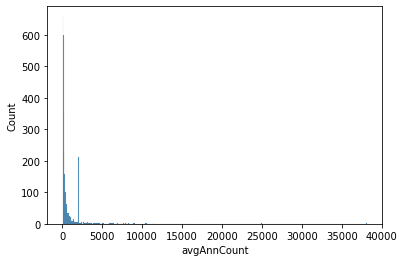

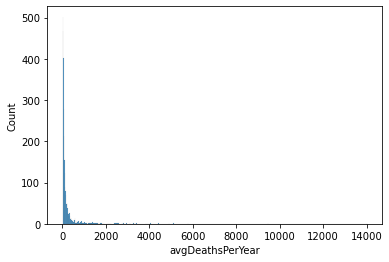

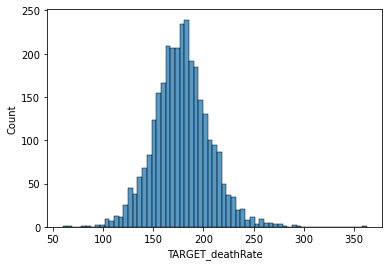

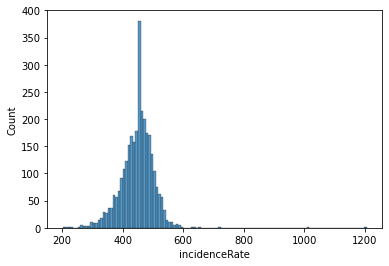

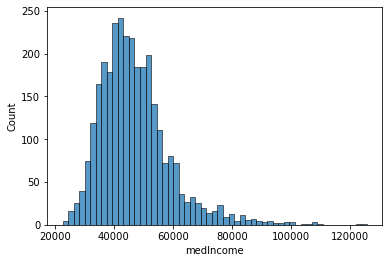

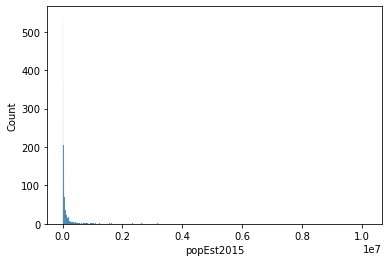

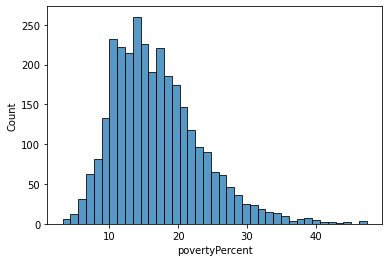

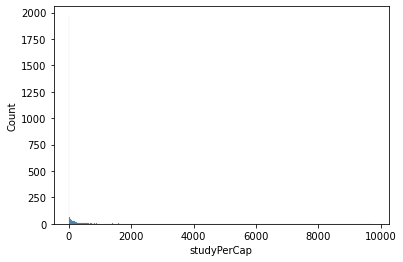

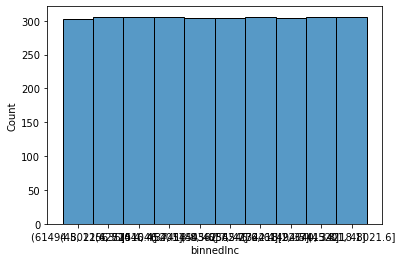

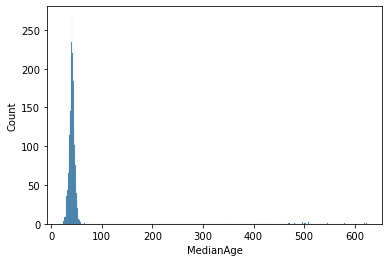

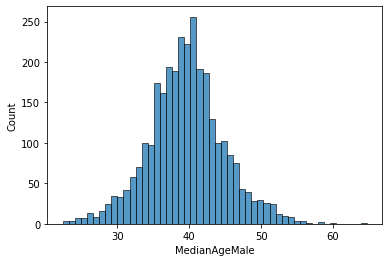

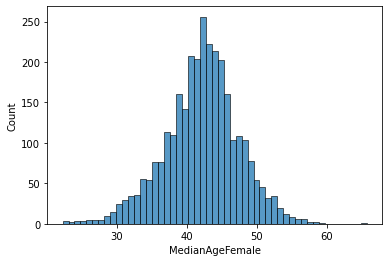

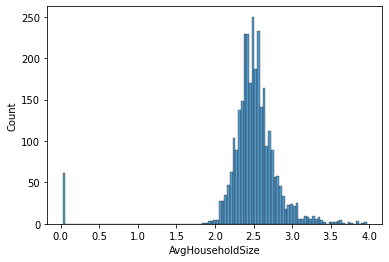

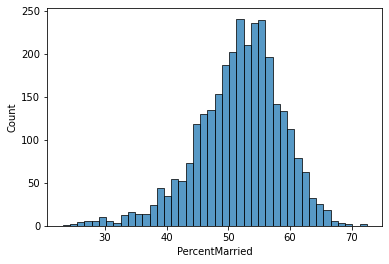

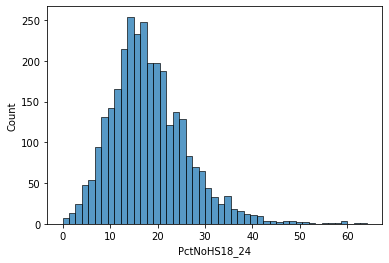

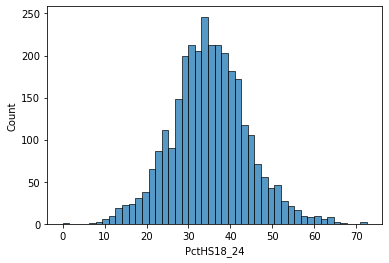

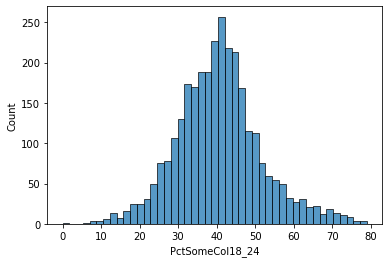

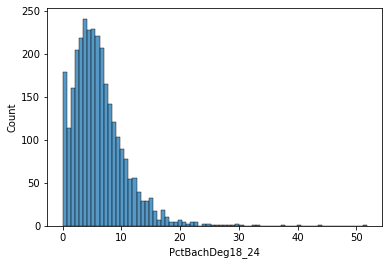

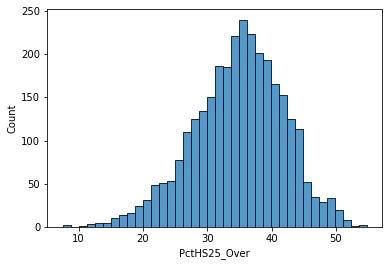

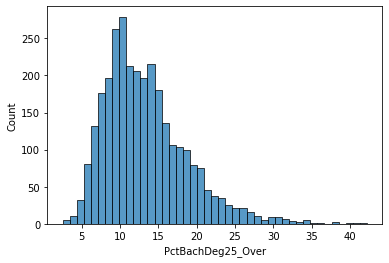

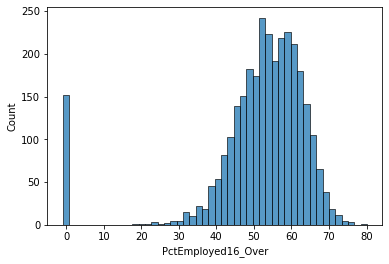

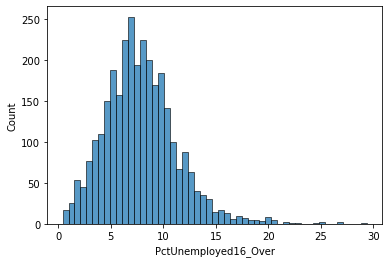

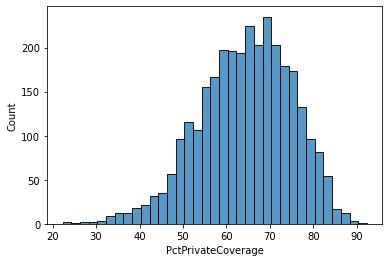

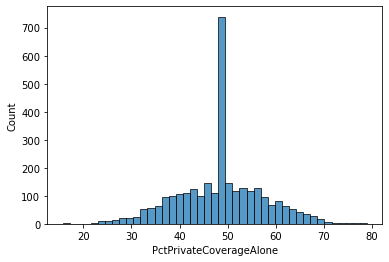

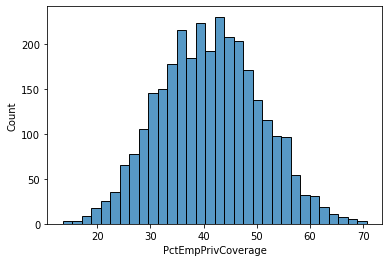

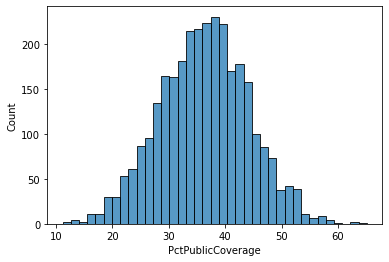

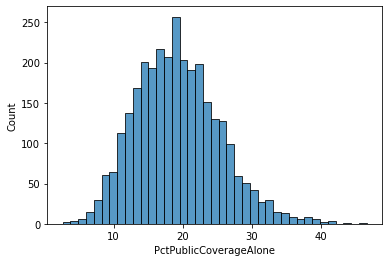

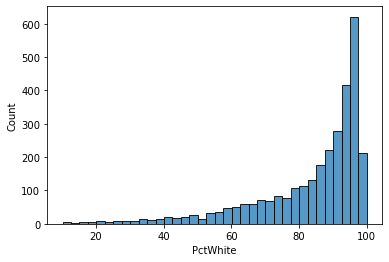

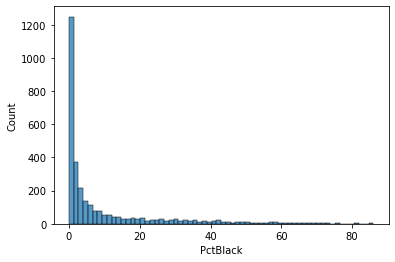

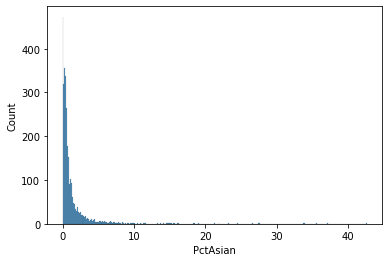

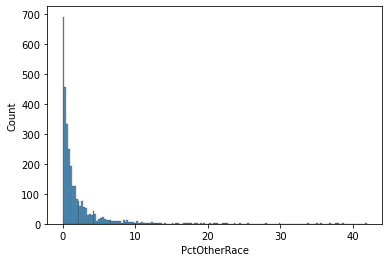

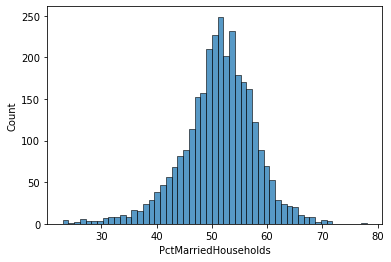

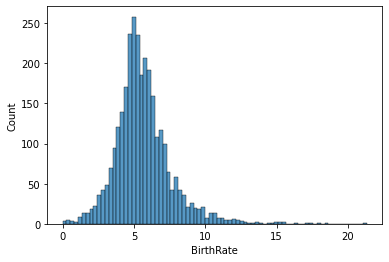

/Users/mariam/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/mariam/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


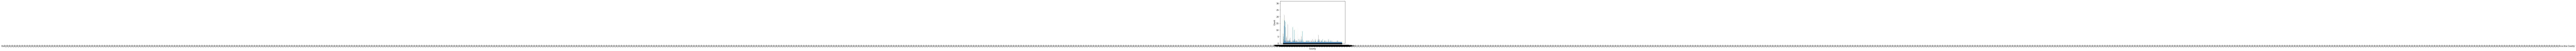

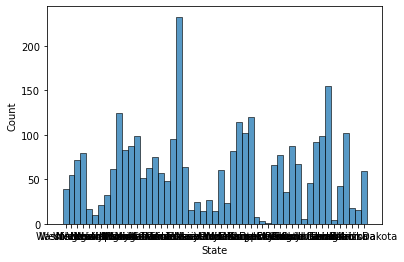

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = cancer_data.columns

for col in columns:
    sns.histplot(data= cancer_data, x=col)
    plt.show()

In [23]:
for col in columns:
    print(f'\n{col}:')
    print(f'{col} max value: ' + str(max(cancer_data[col])))
    print(f'{col} min value: ' + str(min(cancer_data[col])))


avgAnnCount:
avgAnnCount max value: 38150.0
avgAnnCount min value: 6.0

avgDeathsPerYear:
avgDeathsPerYear max value: 14010
avgDeathsPerYear min value: 3

TARGET_deathRate:
TARGET_deathRate max value: 362.8
TARGET_deathRate min value: 59.7

incidenceRate:
incidenceRate max value: 1206.9
incidenceRate min value: 201.3

medIncome:
medIncome max value: 125635
medIncome min value: 22640

popEst2015:
popEst2015 max value: 10170292
popEst2015 min value: 827

povertyPercent:
povertyPercent max value: 47.4
povertyPercent min value: 3.2

studyPerCap:
studyPerCap max value: 9762.308998
studyPerCap min value: 0.0

binnedInc:
binnedInc max value: [22640, 34218.1]
binnedInc min value: (34218.1, 37413.8]

MedianAge:
MedianAge max value: 624.0
MedianAge min value: 22.3

MedianAgeMale:
MedianAgeMale max value: 64.7
MedianAgeMale min value: 22.4

MedianAgeFemale:
MedianAgeFemale max value: 65.7
MedianAgeFemale min value: 22.3

AvgHouseholdSize:
AvgHouseholdSize max value: 3.97
AvgHouseholdSize min val

In [24]:
#Check values above a plausible age

print(cancer_data['MedianAge'].head(5))

for i, age in enumerate(cancer_data['MedianAge']):
    if age > 80:
        print(age)
        
#Correct values
for i, age in enumerate(cancer_data['MedianAge']):
    if age > 80:
        cancer_data.at[i, 'MedianAge'] = age / 10
                
print(cancer_data['MedianAge'].max())

0    39.3
1    33.0
2    45.0
3    42.8
4    48.3
Name: MedianAge, dtype: float64
458.4
469.2
546.0
624.0
508.8
619.2
498.0
412.8
481.2
424.8
535.2
406.8
579.6
502.8
496.8
525.6
519.6
536.4
523.2
470.4
430.8
414.0
500.4
429.6
501.6
496.8
349.2
511.2
498.0
508.8
65.3


In [25]:
for i, size in enumerate(cancer_data['AvgHouseholdSize']):
    if size < 1:
        print(size)

0.0263
0.028
0.0225
0.0242
0.0243
0.0249
0.0254
0.0239
0.0254
0.0243
0.0254
0.0247
0.0242
0.024
0.0248
0.0277
0.0256
0.0248
0.0248
0.0273
0.0313
0.0248
0.0268
0.0249
0.0243
0.0261
0.0221
0.0271
0.0253
0.0248
0.0245
0.0241
0.0222
0.0277
0.0243
0.0237
0.0248
0.0268
0.026
0.0248
0.0322
0.0254
0.0237
0.0236
0.0257
0.0222
0.0261
0.0242
0.0255
0.023
0.0241
0.025
0.024
0.026
0.0249
0.0259
0.027
0.026
0.027
0.024
0.0251


In [26]:
#Correct values
for i, size in enumerate(cancer_data['AvgHouseholdSize']):
    if size < 1:
        cancer_data.at[i, 'AvgHouseholdSize'] = size*100
        
#Check
print(cancer_data['AvgHouseholdSize'].min())

1.86


In [27]:
cancer_data.to_csv('cleaned_cancer_data.csv', index=False, encoding='UTF-8')  